In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('data_project_V2.csv')
features = [f'feature{i}' for i in range(1, 11)]
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Inspect Data

In [54]:
df.dtypes 

date         datetime64[ns]
stockid              object
feature1            float64
feature2            float64
feature3            float64
feature4            float64
feature5            float64
feature6            float64
feature7            float64
feature8            float64
feature9            float64
feature10           float64
target              float64
dtype: object

<Axes: title={'center': 'Number of records per date'}, xlabel='date'>

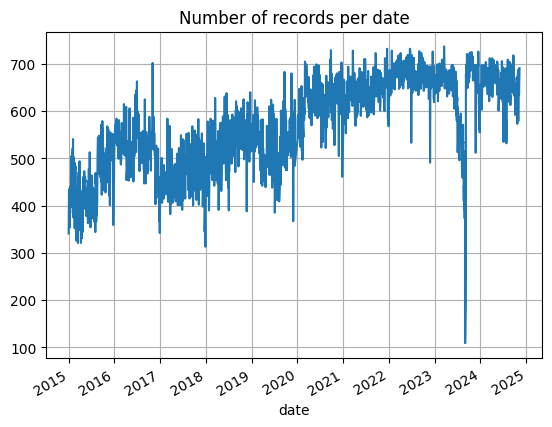

In [55]:
df.groupby('date').size().plot(grid=True, title='Number of records per date')

In [56]:
df.head(4).T

,0,1,2,3
date,2015-01-02 00:00:00,2015-01-02 00:00:00,2015-01-02 00:00:00,2015-01-02 00:00:00
stockid,BBG000B9WH86,BBG000B9XG87,BBG000B9XRY4,BBG000B9Z0J8
feature1,0.209,0.169,0.17,0.154
feature2,0.211,0.192,0.222,0.22
feature3,0.194,0.172,0.173,0.175
feature4,-0.266774,-0.351393,-0.105422,-0.17987
feature5,-0.085662,-0.116099,-0.031707,-0.049826
feature6,-0.195641,-0.239938,-0.081594,-0.132536
feature7,0.956352,0.991401,0.986343,1.018255
feature8,0.416179,0.443522,0.359101,0.480969


In [57]:
df.shape

(1408800, 13)

<Axes: >

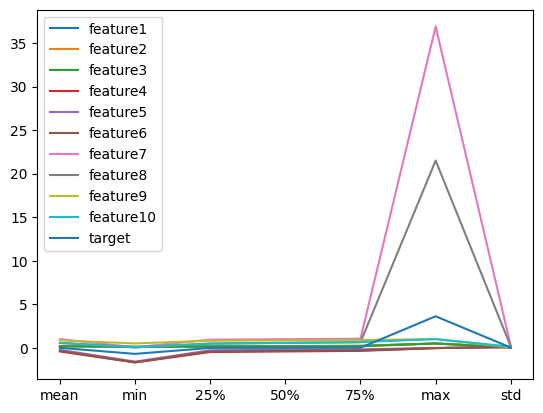

In [58]:
df.describe().iloc[1:, 1:].plot()

<Axes: xlabel='date'>

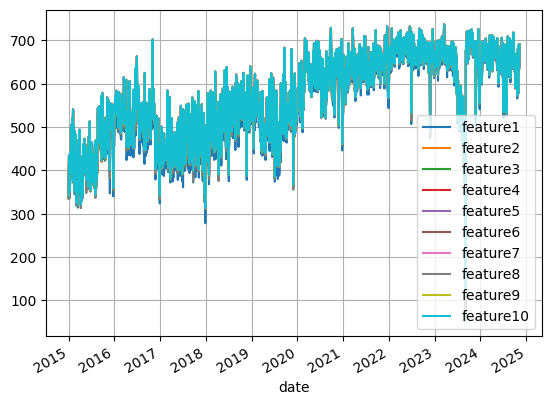

In [59]:
df.groupby('date')[features].count().plot(grid=True)

In [60]:
ins_df = pd.read_parquet('data_project_V2_insample.parquet', engine='fastparquet')
df = ins_df

## correlations

In [67]:
ins_df.max()

date         2022-12-30 00:00:00
stockid             BBG01B9G42Y3
feature1                     0.5
feature2                     0.5
feature3                     0.5
feature4               -0.035737
feature5               -0.011592
feature6               -0.030086
feature7                     2.0
feature8                     2.0
feature9                     1.0
feature10                    1.0
target                  3.619946
dtype: object

<Axes: >

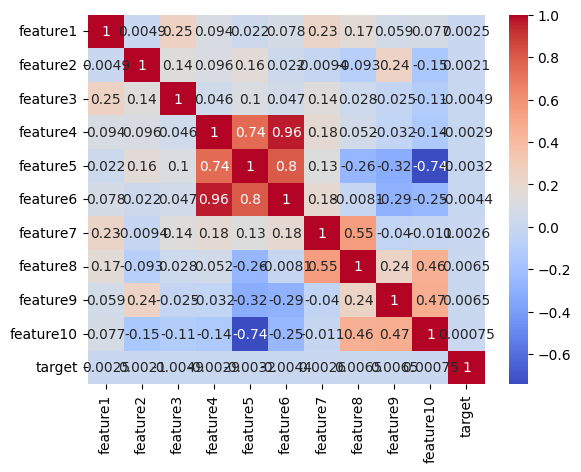

In [66]:
sns.heatmap(ins_df[features + ['target']].corr(), annot=True, cmap='coolwarm')

In [ ]:
fix combine 4 an 6

ridge, make alpha big enough to reduce overfitting
feature charasteristics: feature autocorrelation (optional)

In [69]:
len(df)

1105467

In [62]:
# linear regress on each feature vs target
import statsmodels.api as sm
for f in features:
    X = sm.add_constant(df[f])
    y = df['target']
    model = sm.OLS(y, X).fit()
    print(f"{f}: p-value={model.pvalues[1]:.4f}, coef={model.params[1]:.4f}")
    print(model.summary())
    print()



ModuleNotFoundError: No module named 'statsmodels'

## Feature distributions

In [11]:
df[features].skew()


feature1      1.532863
feature2      1.954785
feature3      2.105534
feature4     -0.055042
feature5     -0.291372
feature6     -0.040228
feature7     45.776500
feature8     25.873809
feature9     -0.756769
feature10    -0.207297
dtype: float64

In [12]:
df[features].kurtosis()

feature1        3.236336
feature2        6.186195
feature3        8.813899
feature4       -0.090665
feature5        0.158437
feature6        0.059307
feature7     3673.712469
feature8     1906.578699
feature9        0.680772
feature10      -0.536773
dtype: float64

<Axes: >

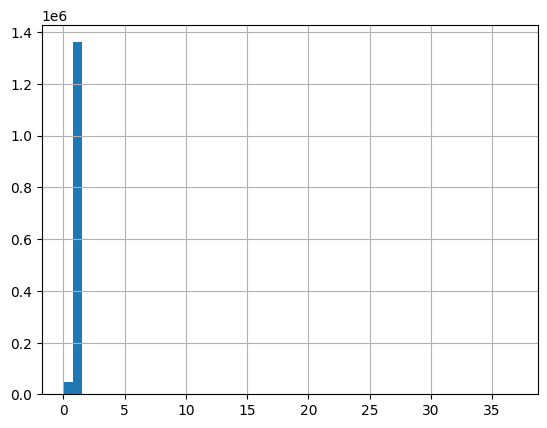

In [22]:
df['feature7'].hist(bins=50)

<Axes: >

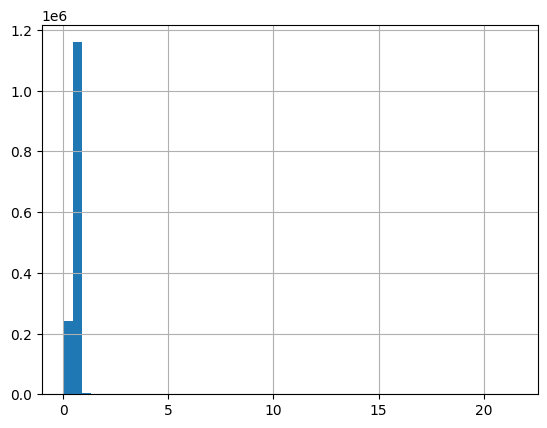

In [23]:
df['feature8'].hist(bins=50)

array([[<Axes: title={'center': 'feature1'}>,
        <Axes: title={'center': 'feature2'}>,
        <Axes: title={'center': 'feature3'}>],
       [<Axes: title={'center': 'feature4'}>,
        <Axes: title={'center': 'feature5'}>,
        <Axes: title={'center': 'feature6'}>],
       [<Axes: title={'center': 'feature7'}>,
        <Axes: title={'center': 'feature8'}>,
        <Axes: title={'center': 'feature9'}>],
       [<Axes: title={'center': 'feature10'}>, <Axes: >, <Axes: >]],
      dtype=object)

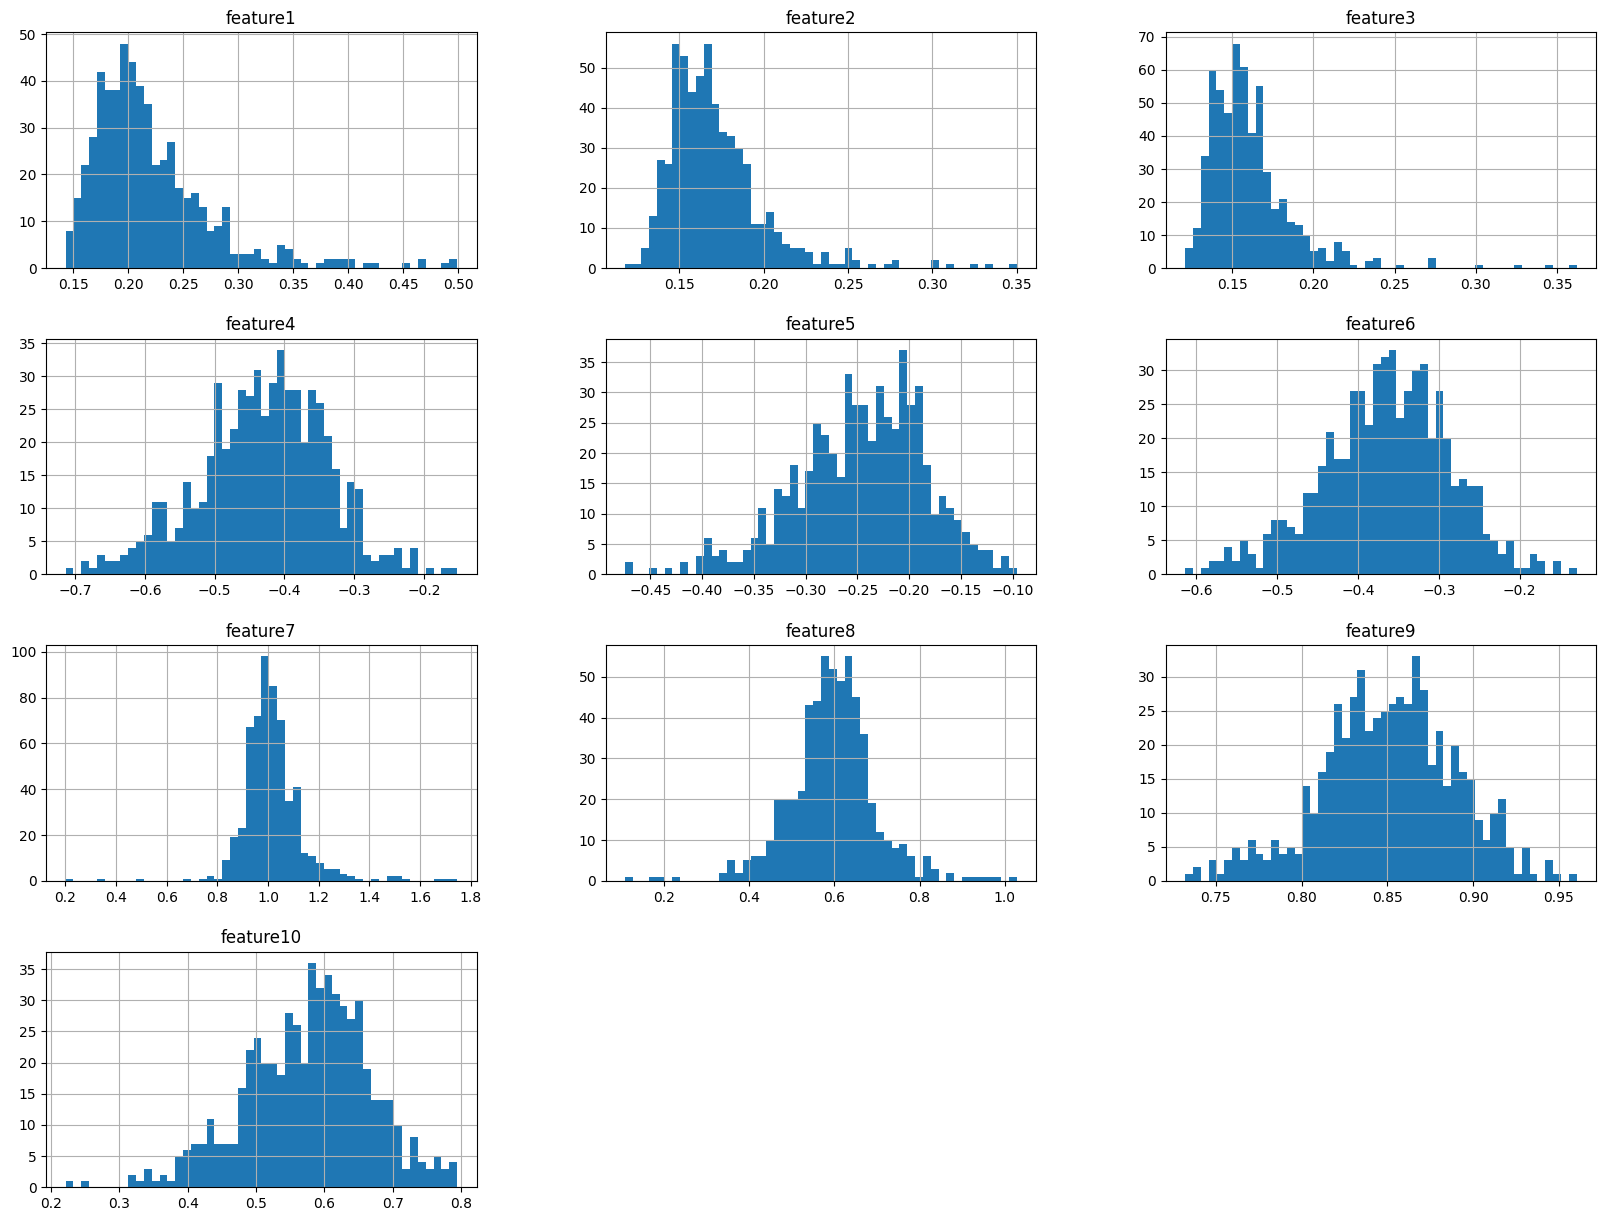

In [24]:
df.loc[df.date == '2020-01-03', features].hist(bins=50, figsize=(20, 15))

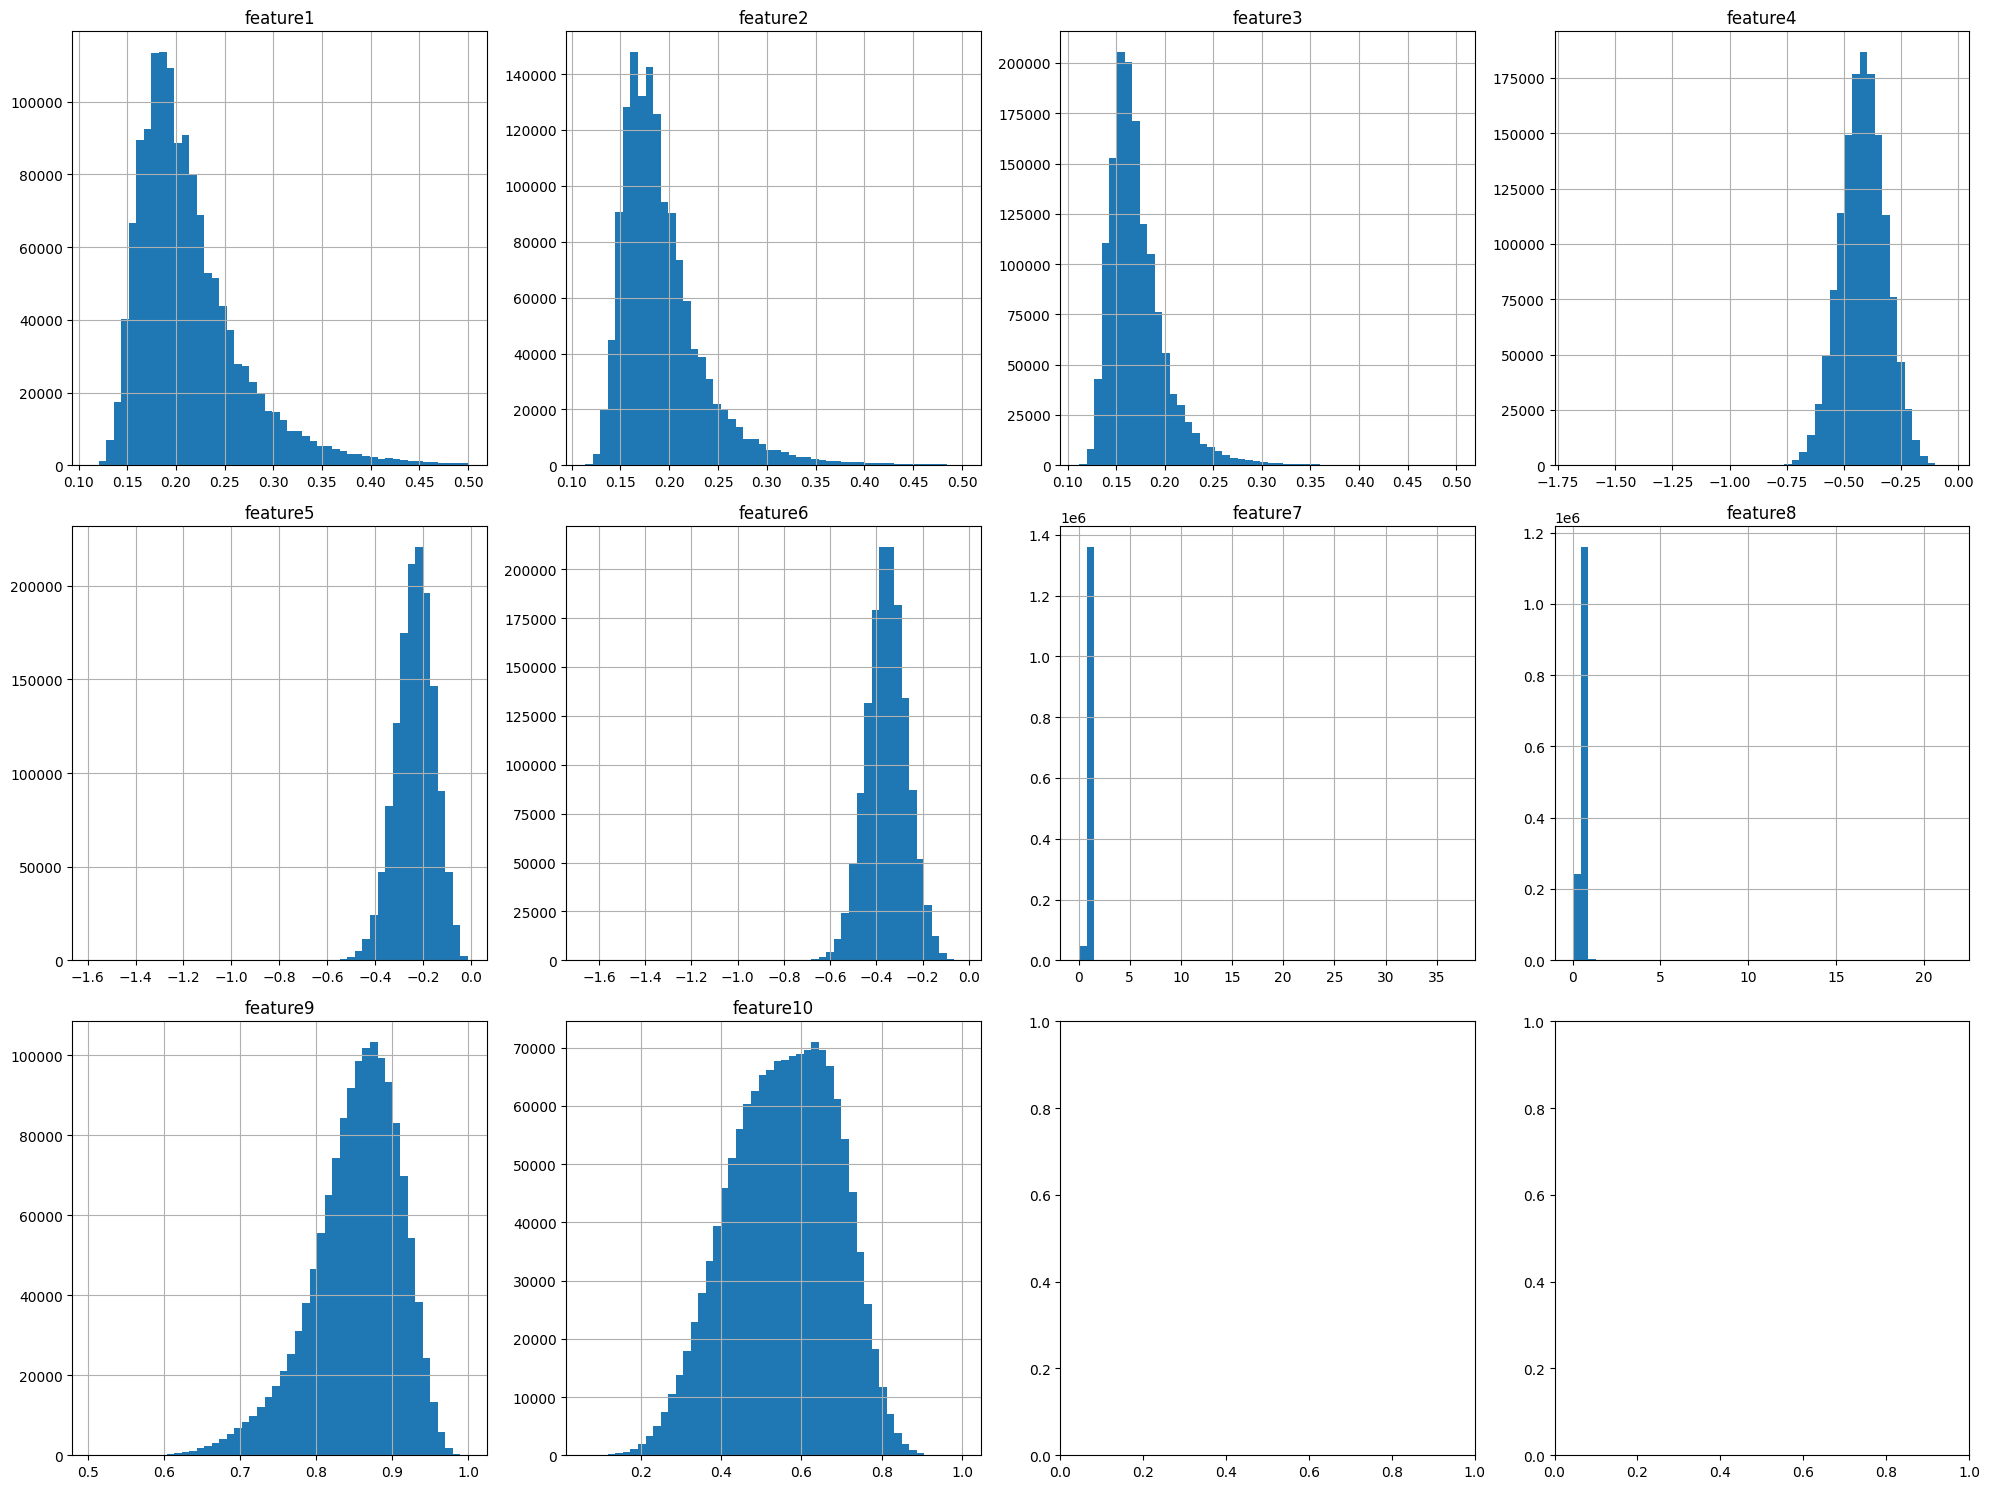

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
for i, feature in enumerate(features):
    ax = axes[i // 4, i % 4]
    df[feature].hist(bins=50, ax=ax)
    ax.set_title(feature)
plt.tight_layout()

## Turnover

In [13]:
tver = df.sort_values(['stockid', 'date']).groupby('stockid')[features].apply(lambda x: x.diff().abs().sum() / x.abs().sum())
tver.mean()

feature1     0.200589
feature2     0.174748
feature3     0.144654
feature4     0.163392
feature5     0.221932
feature6     0.169777
feature7     0.103029
feature8     0.136397
feature9     0.040023
feature10    0.130120
dtype: float64

<Axes: xlabel='date'>

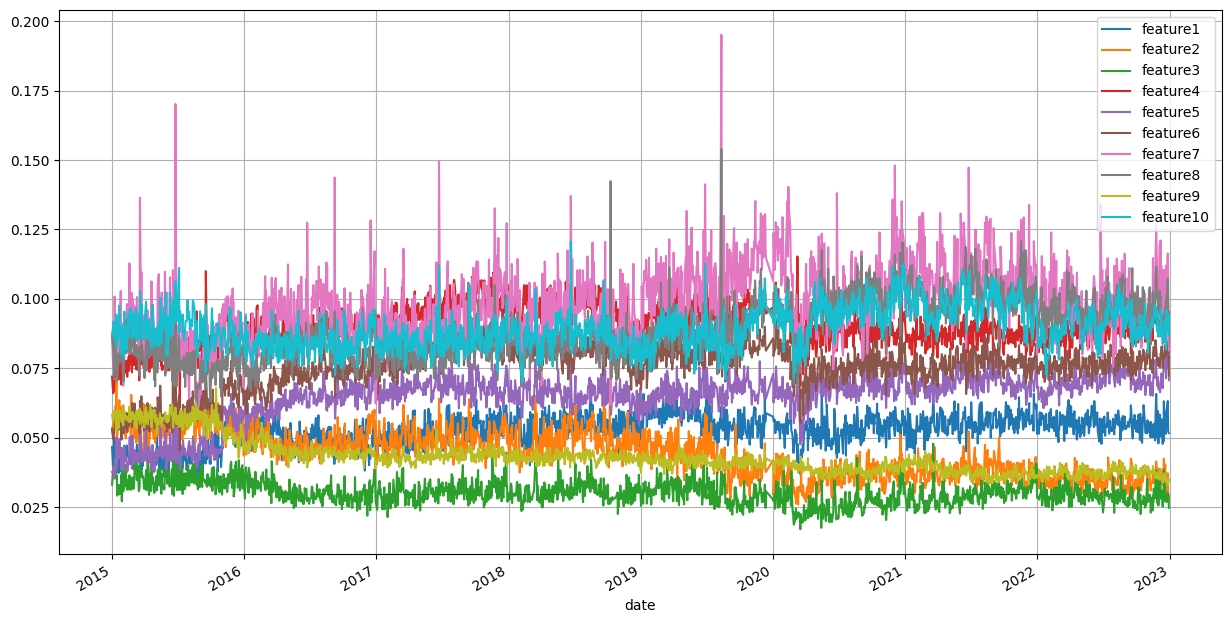

In [68]:
df.groupby('date')[features].std().plot(figsize=(15, 8), grid=True)

stationary,
missing,
add lagged features * 2


Reason to do so:

## Clip 7 and 8

In [15]:
df[['feature7','feature8']] = df[['feature7','feature8']].clip(upper=2)

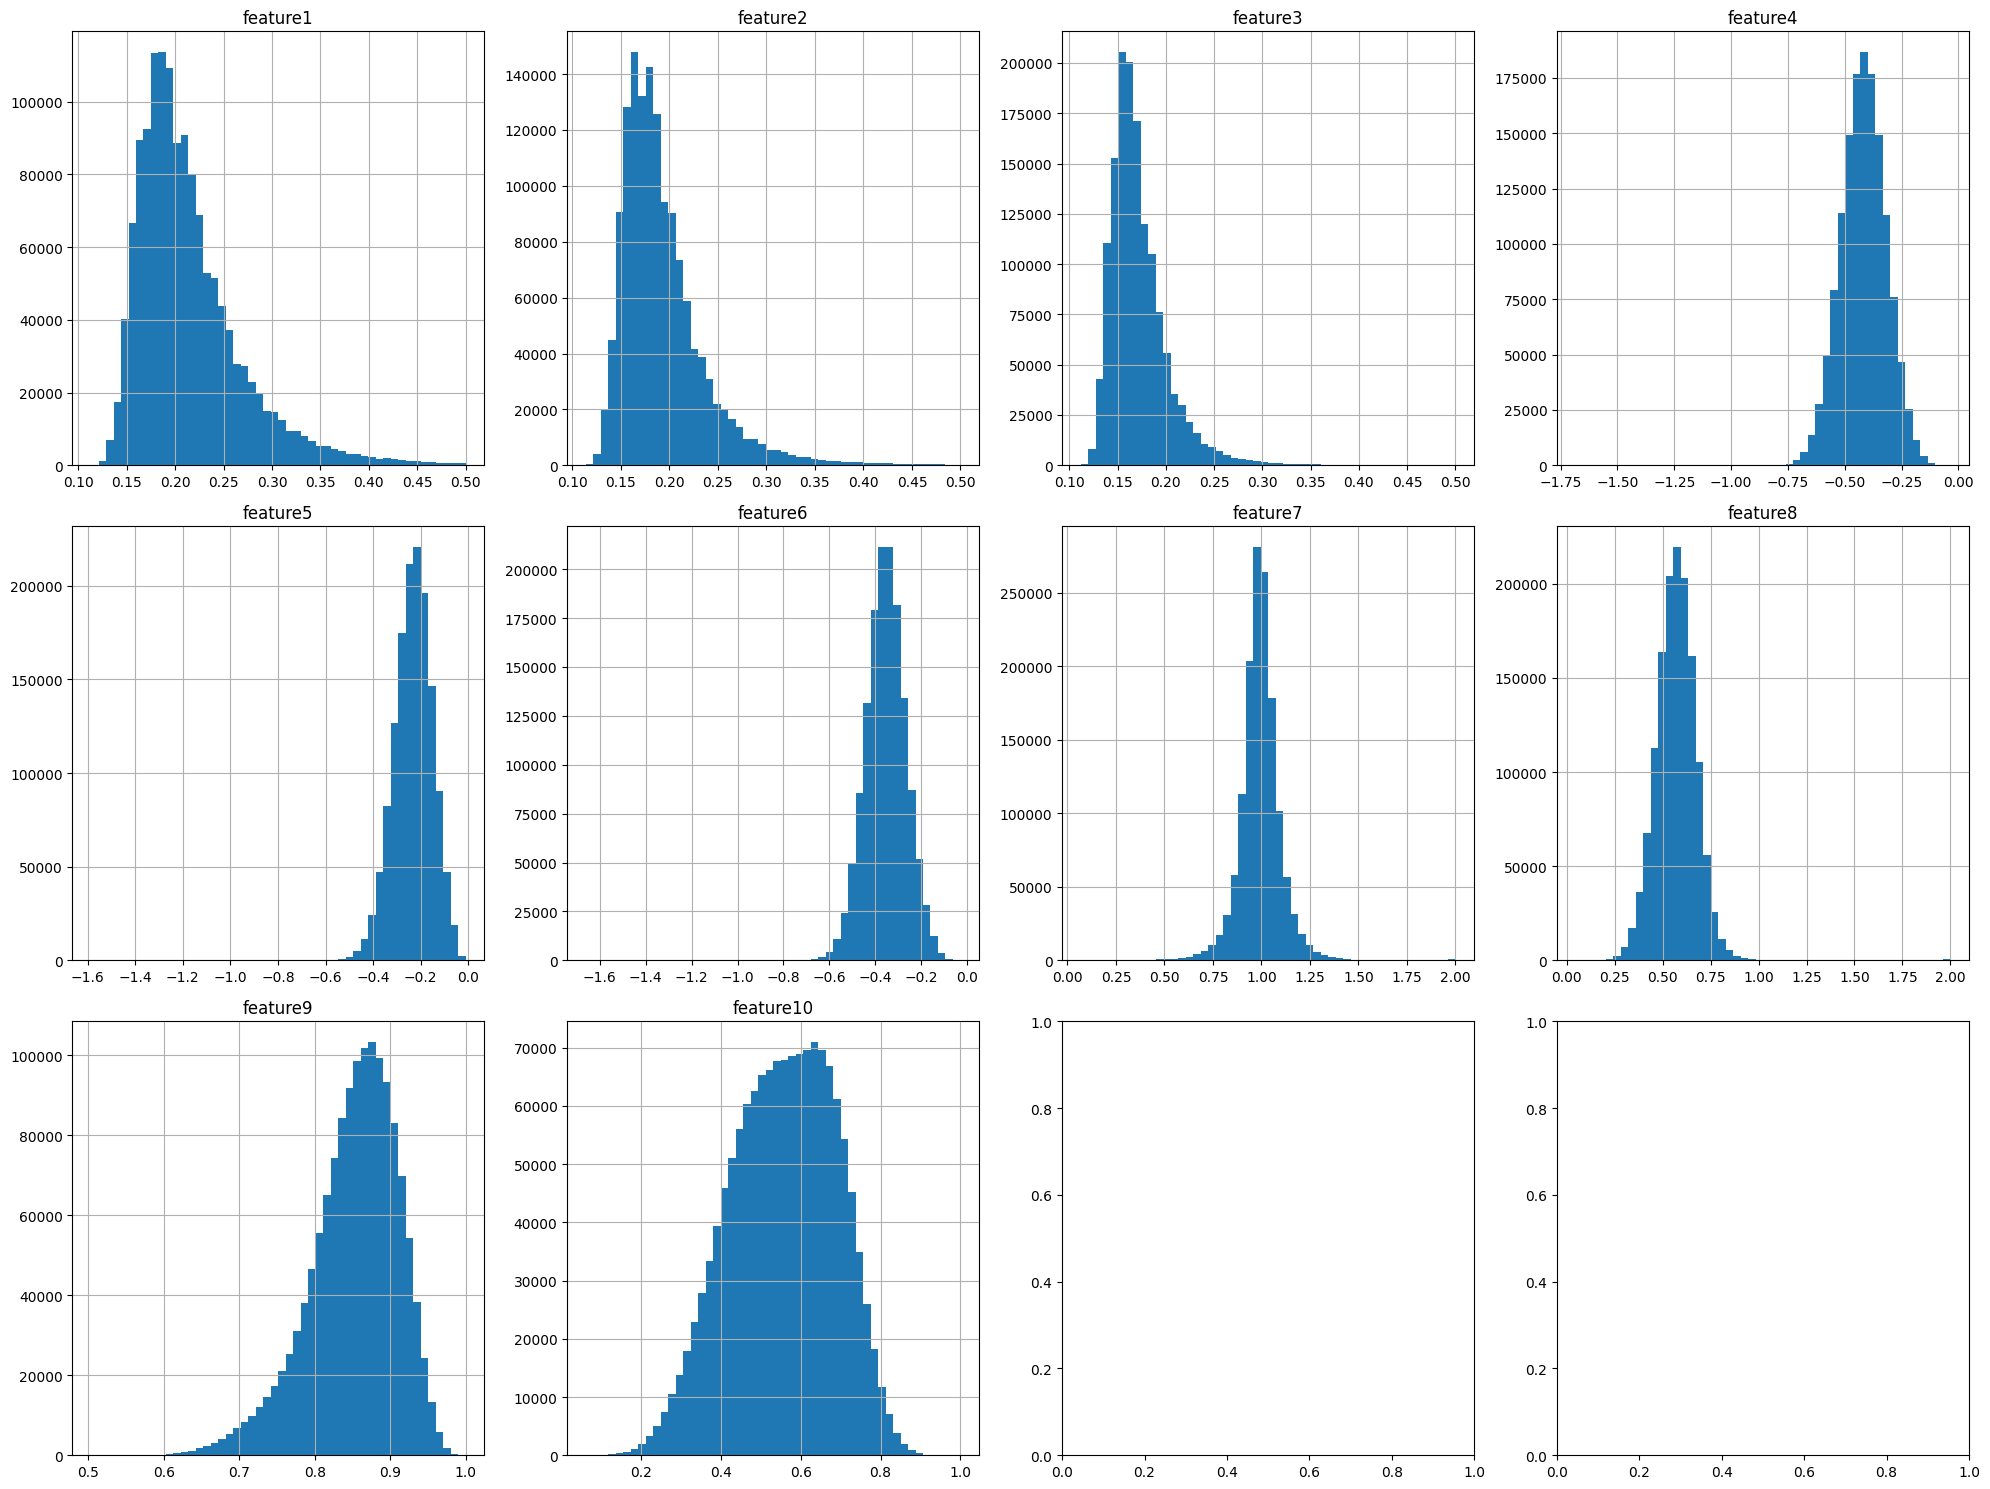

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
for i, feature in enumerate(features):
    ax = axes[i // 4, i % 4]
    df[feature].hist(bins=50, ax=ax)
    ax.set_title(feature)
plt.tight_layout()

AttributeError: QuadMesh.set() got an unexpected keyword argument 'size'

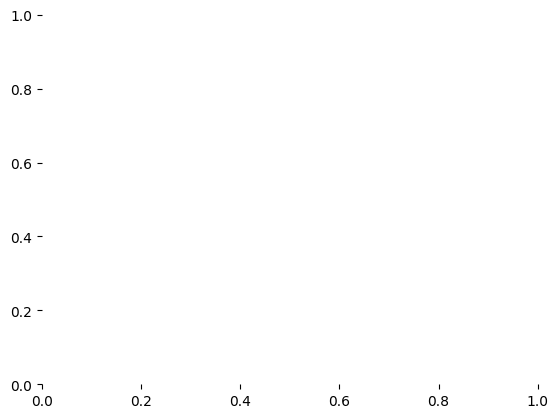

In [51]:
# df['ret'] = df.groupby('stockid')['target'].shift(-2)
# sns.heatmap(df[features + ['target','ret']].corr(), annot=True, cmap='coolwarm')
sns.heatmap(df[features + ['target']].corr(), annot=True, cmap='coolwarm', size=(20,16))

## NAs

In [17]:
df.isna().sum()

date             0
stockid          0
feature1     27297
feature2      2183
feature3      5087
feature4         0
feature5         0
feature6         0
feature7         0
feature8      4862
feature9         0
feature10        0
target        1531
dtype: int64

In [18]:
df = df[df['target'].notna()].reset_index(drop=True)
df.to_parquet('data_project_V2_clean.parquet', index=False)

# IC Analysis

In [ ]:
df = pd.read_parquet("/Users/cyang/src/polymer/data_project_V2_clean.parquet", engine="fastparquet")
ins_df = df[df['date'] <= "2023-01-01"].reset_index(drop=True)
ins_df.to_parquet('data_project_V2_insample.parquet', index=False)
oos_df = df[df['date'] > "2023-01-01"].reset_index(drop=True)
oos_df.to_parquet('data_project_V2_oos.parquet', index=False)


In [47]:
import numpy as np, pandas as pd
FEATURE_COLS = [f"feature{i}" for i in range(1, 11)]
ics = ins_df.groupby("date").apply(lambda g: g[FEATURE_COLS].corrwith(g["target"], method="spearman"))
ic_mean = ics.mean().sort_values(ascending=False)           # mean IC per feature
ic_t = ics.apply(lambda s: s.mean() / (s.std(ddof=1)/np.sqrt(s.count())), axis=0)  # t-stat
display(ic_mean.head(10).to_frame("mean_IC").join(ic_t.rename("t_IC")).head(10))


/var/folders/_k/9145302s6s53fylr_cs9f17c0000gn/T/ipykernel_4498/2784976017.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ics = ins_df.groupby("date").apply(lambda g: g[FEATURE_COLS].corrwith(g["target"], method="spearman"))


,mean_IC,t_IC
feature8,0.009736,4.883085
feature7,0.004385,3.588163
feature1,0.003006,2.272884
feature2,0.002564,1.793997
feature4,0.002264,1.314290
feature6,0.002189,1.255809
feature9,0.001923,1.319097
feature10,0.001593,0.858066
feature5,0.000616,0.366673
feature3,-0.002533,-1.726980


<Axes: title={'center': 'Cumulative IC of Features'}, xlabel='date'>

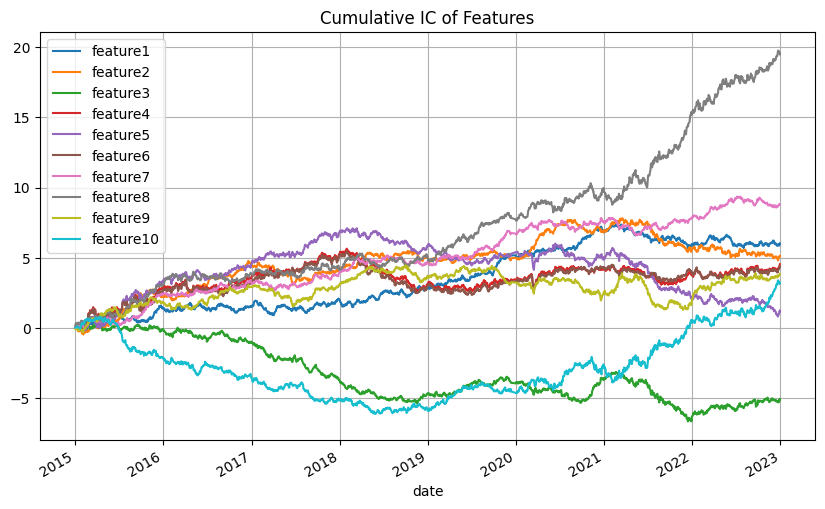

In [48]:
ics.cumsum().plot(figsize=(10, 6), grid=True, title="Cumulative IC of Features")

<Axes: title={'center': 'Rolling IC of Features'}, xlabel='date'>

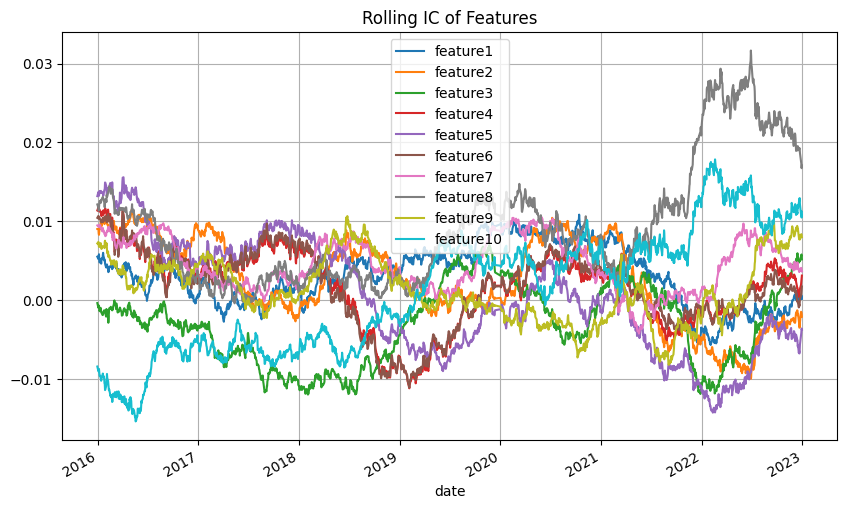

In [49]:
ics.rolling(252).mean().plot(figsize=(10, 6), grid=True, title="Rolling IC of Features")

In [50]:
# calc mean IC and t-stats with consideration for autocorrelation
def ic_stats(ic_series):
    n = ic_series.count()
    if n < 2:
        return pd.Series({"mean_IC": np.nan, "t_IC": np.nan})
    mean_ic = ic_series.mean()
    # bartlett kernel lag window
    T = len(ic_series)
    L = np.floor(4 * (T / 100) ** (2 / 9)).astype(int)
    # L = 2
    print( "Newey-West standard error with lag", L)
    se = np.sqrt((ic_series**2).sum() / n + 2 * sum((1 - lag / L) * ic_series.autocorr(lag) * (ic_series[:-lag] * ic_series[lag:]).sum() / n for lag in range(1, L+1)))
    t_ic = mean_ic / (se / np.sqrt(n))
    return pd.Series({"mean_IC": mean_ic, "t_IC": t_ic})
ic_summary = ics.apply(ic_stats).T.sort_values("mean_IC", ascending=False)
display(ic_summary)

Newey-West standard error with lag 7
Newey-West standard error with lag 7
Newey-West standard error with lag 7
Newey-West standard error with lag 7
Newey-West standard error with lag 7
Newey-West standard error with lag 7
Newey-West standard error with lag 7
Newey-West standard error with lag 7
Newey-West standard error with lag 7
Newey-West standard error with lag 7


,mean_IC,t_IC
feature8,0.009736,4.845175
feature7,0.004385,3.484241
feature1,0.003006,2.242774
feature2,0.002564,1.812003
feature4,0.002264,1.337385
feature6,0.002189,1.289898
feature9,0.001923,1.252602
feature10,0.001593,0.868442
feature5,0.000616,0.360005
feature3,-0.002533,-1.793079
